(606, 915, 4)

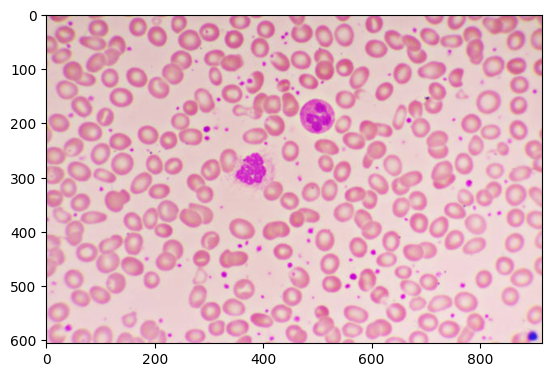

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

image=plt.imread('bloodsmear.png')
plt.imshow(image)
image.shape

In [12]:
X_img = np.reshape(image, (image.shape[0] * image.shape[1], 4))
X_img.shape
print(X_img[:,0:3])

[[0.8392157  0.74509805 0.6901961 ]
 [0.8235294  0.7254902  0.6862745 ]
 [0.80784315 0.7019608  0.6901961 ]
 ...
 [0.9490196  0.84705883 0.827451  ]
 [0.9490196  0.8509804  0.827451  ]
 [0.9490196  0.8509804  0.83137256]]


In [13]:
kmeans = KMeans(n_clusters=5, init=np.array([[0.8072969,0.19413221,0.7822171 ],[0.9118644,0.8147186,0.7986859 ],[0.8592312,0.5646781,0.64658725],[0,0,0],[0,0,0]]),random_state=0)
kmeans.fit(X_img[:,0:3])

X_recovered = kmeans.cluster_centers_[kmeans.labels_]

c:\Users\muska\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\muska\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


In [14]:
clustered_image = np.reshape(X_recovered, (image.shape[0],image.shape[1], 3)) 
print(clustered_image.shape)

(606, 915, 3)


[[0.85847014 0.495924   0.6603025 ]
 [0.9134095  0.814059   0.79923475]
 [0.88853776 0.651804   0.7203261 ]
 [0.3480736  0.17881596 0.83153015]
 [0.82939374 0.211981   0.77930564]]


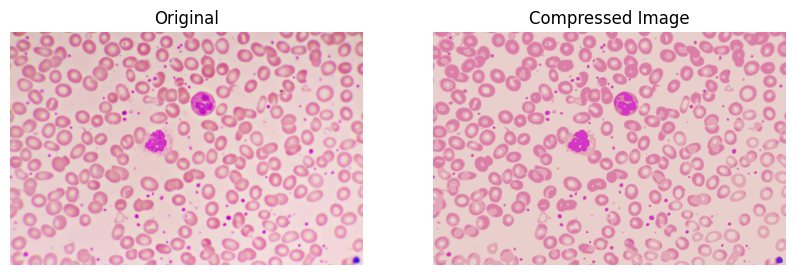

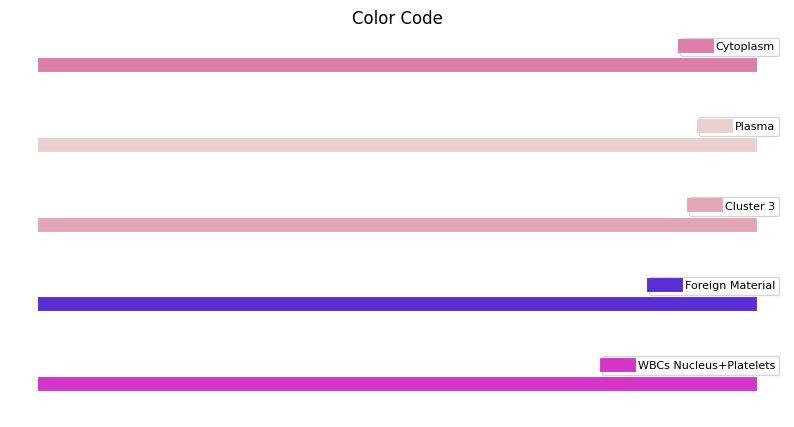

In [15]:
fig, ax = plt.subplots(1,2, figsize=(10,10))
plt.axis('off')

ax[0].imshow(image)
ax[0].set_title('Original')
ax[0].set_axis_off()

ax[1].imshow(clustered_image)
ax[1].set_title('Compressed Image')
ax[1].set_axis_off()

centroids = kmeans.cluster_centers_
print(centroids)

cluster_labels=['Cytoplasm','Plasma','Cluster 3','Foreign Material','WBCs Nucleus+Platelets']
fig, ax = plt.subplots(5,1, figsize=(10,5))

ax[0].set_title("Color Code")
for i,centroid in enumerate(centroids):
    color = centroid
    ax[i].plot([0, 1], [0, 0], label=cluster_labels[i],color=color, linewidth=10)
    ax[i].legend(loc='upper right',fontsize=8)
    ax[i].axis('off')

